In [18]:
import numpy as np
import math 
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
class vol:          #define a class to calculate the volatility required to do other computations 
    def __init__(self,m,S0,K,T,r,q,v):
        self.m=m
        self.S0=S0
        self.K=K
        self.T=T
        self.r=r
        self.q=q
        self.v=v
        self.z= np.random.normal(size=m)       #create a vector with m standard normal values
        self.St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*self.z) #create a vector with m future prices
        
        #volatility will be calculated as the standard deviation of a vector of m payoffs
        
    def callsigma(self):    #a method to return the vol of the call option.
        payoff=np.exp(-self.r*self.T)*np.maximum(self.St-self.K,0)
        return np.std(payoff)
    
    def putsigma(self): # a method to return volatility of the put option 
        payoff= np.exp(-self.r*self.T)*np.maximum(self.K-self.St,0)
        return np.std(payoff)
    
    def forwardsigma(self): # a method to return volatility of the forward contract 
        payoff=np.exp(-self.r*self.T)*self.St
        return np.std(payoff)
        

In [4]:
class yolo:
    def __init__(self,tol,m,S0,K,T,r,q,v,trade):
        self.tol=tol
        self.m=m
        self.S0=S0
        self.K=K
        self.T=T
        self.r=r
        self.q=q
        self.v=v
        self.x=vol(self.m,self.S0,self.K,self.T,self.r,self.q,self.v) #create an atrribute of the simulated volatility 
        self.trade= trade   # a string of what derivative we are looking for (call,put or forward) to use the correspoding vol
        
    def Ncalc(self):               # method to calculate N ,answers question 1 section A part I 
        if self.trade=='call':
            return (1.96*self.x.callsigma()/self.tol)**2
        elif self.trade =='put':
            return (1.96*self.x.putsigma()/self.tol)**2
        else:
            return (1.96*self.x.forwardsigma()/self.tol)**2
    
    def results(self,antithetical='No'):   #method to answer the question 1 section A part II ,and section C
        if antithetical== 'No':    #if no extra parameter is entered,we do not perform antithetical sampling 
            
            if self.trade=='call':
                z=np.random.normal(size=math.ceil(self.Ncalc()))            #calculate a new sample of size N ,we need to round it up because only an integer can be an input arguement 
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)    #calculate new price sample size N
                payoff= np.exp(-self.r*self.T)*np.maximum(St-self.K,0)           #calculate new payoff sample of size N 
                Vsim= np.mean(payoff)                                           #calculate the simulated price as the average of the sample
                return self.Ncalc(),Vsim, [Vsim-self.tol,Vsim+self.tol]          #return what the question is asking 
        
            if self.trade== 'put':
                z=np.random.normal(size=math.ceil(self.Ncalc()))
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)
                payoff=np.exp(-self.r*self.T)*np.maximum(self.K-St,0)
                Vsim = np.mean(payoff)
                return self.Ncalc(),Vsim,[Vsim-self.tol, Vsim+self.tol]
        
            if self.trade=='forward':
            
                z=np.random.normal(size=math.ceil(self.Ncalc()))
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)
                payoff= np.exp(-self.r*self.T)*St
                Vsim= np.mean(payoff)
                return self.Ncalc(),Vsim,[Vsim-self.tol,Vsim+self.tol]
        
        elif antithetical=='Yes':
            
            if self.trade=='call':
                z1=np.random.normal(size=math.ceil(self.Ncalc()/2))         #take half of N,round it up to the nearest int
                z=np.append(z1,-z1)                                                  #create the antithetical sample 
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)    
                payoff= np.exp(-self.r*self.T)*np.maximum(St-self.K,0)           
                Vsim= np.mean(payoff)                                           
                return self.Ncalc(),Vsim, [Vsim-self.tol,Vsim+self.tol]
            
            if self.trade== 'put':
                z1=np.random.normal(size=math.ceil(self.Ncalc()/2))
                z=np.append(z1,-z1)
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)
                payoff=np.exp(-self.r*self.T)*np.maximum(self.K-St,0)
                Vsim = np.mean(payoff)
                return self.Ncalc(),Vsim,[Vsim-self.tol, Vsim+self.tol]
            
            if self.trade=='forward':
            
                z1=np.random.normal(size=math.ceil(self.Ncalc()/2))
                z=np.append(z1,-z1)
                St=self.S0*np.exp((self.r-self.q-self.v**2/2)*self.T + self.v*np.sqrt(self.T)*z)
                payoff= np.exp(-self.r*self.T)*St
                Vsim= np.mean(payoff)
                return self.Ncalc(),Vsim,[Vsim-self.tol,Vsim+self.tol]
                
            
            
            
        
            
    

In [117]:
#Answers question1  section A part III

for i in ['call','put','forward']:    
    x=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,i)
    print(x.results())
    
    
    
    

(41811736.40549226, 28.530192615207387, [28.430192615207385, 28.63019261520739])
(201896.9879150558, 46.852836426685045, [46.75283642668504, 46.952836426685046])
(27355230.930204153, 48.115540997025064, [48.01554099702506, 48.215540997025066])


In [96]:
abs(dt.date(2018,7,3)-dt.date(2018,4,6)).days   # to get the difference in days used in the previous question 

88

In [7]:
#Answers question 1 section B   if you try to rerun this, beware it takes about 30 mins

callsim=np.zeros(1000)       #create zero vectors that will later store the values of the simulations
putsim=np.zeros(1000)
forwardsim=np.zeros(1000)
x=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'call')
y=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'put')
z=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'forward')
for i in range(1000):                                 #repeat the proceedure from the previous question 1000 times
    
    
    
    callsim[i]=x.results()[1]            #take the element at position 1 ,which is Vsim and add it to the nparray of Vsims
    putsim[i]=y.results()[1]
    forwardsim[i]=z.results()[1]



    
  
    

(array([ 2.,  0.,  0.,  1.,  2.,  5.,  3.,  4.,  6., 14.,  8., 17., 14.,
        28., 33., 34., 30., 36., 35., 55., 42., 54., 50., 73., 50., 64.,
        49., 48., 37., 44., 25., 32., 25., 20., 13., 13., 11., 11.,  6.,
         2.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([47.92530275, 47.93217021, 47.93903767, 47.94590513, 47.9527726 ,
        47.95964006, 47.96650752, 47.97337498, 47.98024244, 47.9871099 ,
        47.99397736, 48.00084482, 48.00771229, 48.01457975, 48.02144721,
        48.02831467, 48.03518213, 48.04204959, 48.04891705, 48.05578451,
        48.06265198, 48.06951944, 48.0763869 , 48.08325436, 48.09012182,
        48.09698928, 48.10385674, 48.11072421, 48.11759167, 48.12445913,
        48.13132659, 48.13819405, 48.14506151, 48.15192897, 48.15879643,
        48.1656639 , 48.17253136, 48.17939882, 48.18626628, 48.19313374,
        48.2000012 , 48.20686866, 48.21373612, 48.22060359, 48.22747105,
        48.23433851, 48.24120597, 48.24807343, 48.25494089,

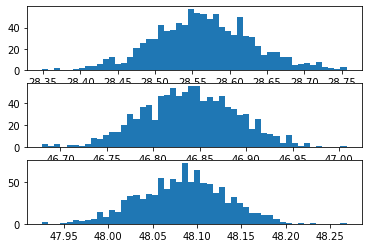

In [8]:
#answer to question 1 section B plots

fig,axs= plt.subplots(3)

axs[0].hist(callsim,bins=50)
axs[1].hist(putsim,bins=50)
axs[2].hist(forwardsim,bins=50)


In [9]:
#answer to question 1 section C  , again beware if you run this that it takes about 30 mins

callsim=np.zeros(1000)       
putsim=np.zeros(1000)
forwardsim=np.zeros(1000)
x=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'call')
y=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'put')
z=yolo(0.1,100000,180,160,88,0.01,0.015,0.2,'forward')
for i in range(1000):                                 
    
    
    
    callsim[i]=x.results('Yes')[1]            #this time select yes, to  perform antithetical sampling
    putsim[i]=y.results('Yes')[1]
    forwardsim[i]=z.results('Yes')[1]

(array([ 3.,  2.,  1.,  2.,  2.,  3.,  7., 11.,  9.,  9., 10., 16., 19.,
        24., 26., 33., 46., 44., 43., 35., 31., 41., 56., 37., 66., 49.,
        46., 40., 42., 44., 33., 31., 23., 20., 13., 17., 15.,  9., 11.,
         6.,  6.,  6.,  4.,  2.,  3.,  1.,  1.,  0.,  0.,  2.]),
 array([47.91726857, 47.92445257, 47.93163658, 47.93882058, 47.94600459,
        47.95318859, 47.9603726 , 47.9675566 , 47.9747406 , 47.98192461,
        47.98910861, 47.99629262, 48.00347662, 48.01066063, 48.01784463,
        48.02502864, 48.03221264, 48.03939665, 48.04658065, 48.05376465,
        48.06094866, 48.06813266, 48.07531667, 48.08250067, 48.08968468,
        48.09686868, 48.10405269, 48.11123669, 48.1184207 , 48.1256047 ,
        48.1327887 , 48.13997271, 48.14715671, 48.15434072, 48.16152472,
        48.16870873, 48.17589273, 48.18307674, 48.19026074, 48.19744475,
        48.20462875, 48.21181275, 48.21899676, 48.22618076, 48.23336477,
        48.24054877, 48.24773278, 48.25491678, 48.26210079,

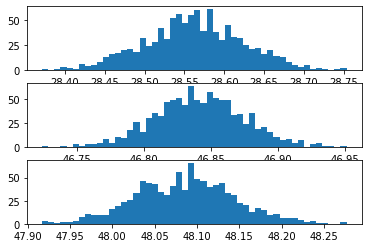

In [10]:
#answer to question 1 section C plots 
fig,axs= plt.subplots(3)                           #we can see that the variance is reduced when we perform antihetical sampling

axs[0].hist(callsim,bins=50)
axs[1].hist(putsim,bins=50)
axs[2].hist(forwardsim,bins=50)

In [21]:
#Answers Question 1 section D part I.   Create a new function that computes a numerical delta 

def delta(S0,K,T,r,q,v,trade,epsilon,tol):
    x= yolo(tol,100000,S0,K,T,r,q,v,trade)     #produce one object to gather the call/put/forward sample from , reminder that each object when instantiated calls a seperate class to compute a new sample standard deviation
    y=yolo(tol,100000,S0+epsilon,K,T,r,q,v,trade)    #produce another one, with a different initial price 
    return (x.results()[1]-y.results()[1])/epsilon
    

In [36]:
#we are going to test convergence on a call 

test= delta(180,160,88,0.01,0.015,0.2,'call',0.01*180,0.1)


#we know that the delta is exp(-q*T)*N(d1) so:

theoretical = np.exp(-0.015*88)*scipy.stats.norm.cdf((np.log(180/160)+(0.01-0.015+0.2**2/2)*88)/(0.2*88**(1/2)))

print(test,theoretical,abs(test-theoretical))


# the difference is varies around 0.37 if we test it many times , this does not seem like a  good approximation 
                                                     

-0.21776216768038498 0.20790159248941467 0.4256637601697997


In [32]:
#Answers Question 1 section D part II. The way i have constructed this classes from the beggining, i cannot draw 
#call/put/forward simulations for 2 different starting prices with the same "z" vector.Restructuring the entire class could take
#a full day, so i am gonna do it manually by defining new functions. We are going to test on a call option again 
def delta2(S0,K,T,r,q,v,trade,epsilon,tol):
    
    test1= yolo(tol,100000,S0,K,T,r,q,v,trade)   # we need to first calculate the N required for both these cases (2 options with different prices) and then we need the different  volatilities for these prices 
    test2= yolo(tol,100000,S0+epsilon,K,T,r,q,v,trade)

# Since N is a function of the sample standard deviation which is a function of the starting price, these 2 will
# have different N, so in order to create 1 "z" vector with the same amount of elements, we are going to pick the larger N 
# to ensure that during all of this we still fall in the 95% confidence interval that is required 

    n=np.maximum(test1.Ncalc(),test2.Ncalc())
    z=np.random.normal(size=math.ceil(n))
    St1=S0*np.exp((r-q-v**2/2)*T+v*T**(1/2)*z)
    St2= (S0+epsilon)*np.exp((r-q-v**2/2)*T+v*T**(1/2)*z)
    payoff1 = np.exp(-r*T)*np.maximum(St1-K,0)
    payoff2= np.exp(-r*T)*np.maximum(St2-K,0)
    Vsim1=np.mean(payoff1)
    Vsim2=np.mean(payoff2)
    return (Vsim2-Vsim1)/epsilon
    
    
    
    
    
     



In [35]:
zzzzz= delta2(180,160,88,0.01,0.015,0.2,'call',0.01*180,0.1)
print(zzzzz,theoretical,abs(zzzzz-theoretical))

#as we can see, the difference is now almost 0. The convergence is way more successful 

0.20786518890710048 0.20790159248941467 3.640358231418728e-05


In [57]:
#Question 2.    First of all we have to recreate a class to calculate the volatilities this time of the correlated GBM's
#then we need another class to recalculate the N for both of them , and then take the maximum, and then perform the simulations 


class vol2:          
    def __init__(self,m,S10,S20,K,T,r,q1,q2,v1,v2,rho):
        self.m=m
        self.S10=S10
        self.S20=S20
        self.K=K
        self.T=T
        self.r=r
        self.q1=q1
        self.q2=q2
        self.v1=v1
        self.v2=v2
        self.rho=rho
        self.z= np.random.multivariate_normal(mean=[0,0],cov=([1,self.rho],[self.rho,1]),size=self.m)    #create a multivariate vector with m standard normal valuesand correlation rho
        self.St1=self.S10*np.exp((self.r-self.q1-self.v1**2/2)*self.T + self.v1*np.sqrt(self.T)*self.z[:,0]) 
        self.St2=self.S20*np.exp((self.r-self.q2-self.v2**2/2)*self.T+self.v2*np.sqrt(self.T)*self.z[:,1])
        
        #assign the first column f the multivariate normal to 1 vector of future prices of St1 , the other to St2
        
    def callsigma(self):    #a method to return the vol of the call option.
        payoff=np.exp(-self.r*self.T)*np.maximum(self.St1-self.St2-self.K,0)
        return np.std(payoff)
    
    def putsigma(self): # a method to return volatility of the put option 
        payoff= np.exp(-self.r*self.T)*np.maximum(self.K-self.St1-self.St2,0)
        return np.std(payoff)
    
  

In [62]:
#Now we adjust the yolo class as well to calculate N , and then simulate the call and put spread payoffs but this time with 
#the bivariate normal with correlation 

class yolo2:
    def __init__(self,tol,m,S10,S20,K,T,r,q1,q2,v1,v2,trade,rho):
        self.tol=tol
        self.m=m
        self.S10=S10
        self.S20=S20
        self.K=K
        self.T=T
        self.r=r
        self.q1=q1
        self.q2=q2
        self.v1=v1
        self.v2=v2
        self.rho=rho
        self.x=vol2(self.m,self.S10,self.S20,self.K,self.T,self.r,self.q1,self.q2,self.v1,self.v2,self.rho) #create an atrribute of the simulated volatility 
        self.trade= trade   # a string of what derivative we are looking for (call,put or forward) to use the correspoding vol
        
    def Ncalc2(self):               # method to calculate N ,answers question 1 section A part I 
        if self.trade=='call':
            return (1.96*self.x.callsigma()/self.tol)**2
        elif self.trade =='put':
            return (1.96*self.x.putsigma()/self.tol)**2
        
    def results2(self):
        z= np.random.multivariate_normal(mean=[0,0],cov=([1,self.rho],[self.rho,1]),size=math.ceil(self.Ncalc2()))
        St1=self.S10*np.exp((self.r-self.q1-self.v1**2/2)*self.T + self.v1*np.sqrt(self.T)*z[:,0]) 
        St2=self.S20*np.exp((self.r-self.q2-self.v2**2/2)*self.T+self.v2*np.sqrt(self.T)*z[:,1])
        if self.trade=='call':
            payoff=np.exp(-self.r*self.T)*np.maximum(St1-St2-self.K,0)
            return np.mean(payoff)
        if self.trade=='put':
            payoff=np.exp(-self.r*self.T)*np.maximum(self.K-St1-St2,0)
            return np.mean(payoff)
        
        
        


In [63]:
for i in ['call','put']:
    last= yolo2(0.1,100000,180,120,20,180,0.02,0.01,0.015,0.2,0.2,i,0.7)
    print(last.results2())


25.29884296035372
0.08417974587715785
